In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 871.7 kB/s eta 0:00:00


In [2]:
from google_play_scraper import Sort, reviews, app
import pandas as pd
import numpy as np

In [3]:
result, continuation_token = reviews(
    'com.ss.android.ugc.trill',
    lang='en',
    country='us',
    sort=Sort.MOST_RELEVANT,
    count=100000,
    filter_score_with=None
)

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
data = pd.DataFrame(np.array(result),columns=['reviews'])
data = data.join(pd.DataFrame(data.pop('reviews').tolist()))
data.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,64f3eca6-2feb-4901-96f4-18729d2516cc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The tiktok latest version doesn't let me edit ...,2,1219,35.9.4,2024-08-11 04:31:48,None,NaT,35.9.4
1,5c9107e9-4988-4769-93e9-c369b0b702a2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"So far, the app is alright. But I had to put a...",3,854,36.0.4,2024-08-12 04:39:33,None,NaT,36.0.4
2,e81320b5-b421-4de8-b36f-12ad4cc5453b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my Galaxy Fold5 is missing some features that ...,2,383,35.9.4,2024-08-07 21:57:18,None,NaT,35.9.4
3,db177c03-4ffa-4e9c-8e89-8ac648faf170,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is honestly one of the best app to se...,3,616,35.9.4,2024-08-10 04:11:54,None,NaT,35.9.4


In [18]:
data.to_csv('Tiktok Reviews.csv', index = False, encoding='utf-8')

In [6]:
data = data[['content','score']]
print(data.head())

                                             content  score
0  The tiktok latest version doesn't let me edit ...      2
1  So far, the app is alright. But I had to put a...      3
2  my Galaxy Fold5 is missing some features that ...      2
3  This app is honestly one of the best app to se...      3
4  horrible. VERY LAGGY app for my phone that's 6...      1


In [7]:
print(data.isnull().sum())

content    0
score      0
dtype: int64


In [8]:
stopword = set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

In [9]:
ratings = data['score'].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, values=quantity,names=numbers,hole=0.5)
figure.show()

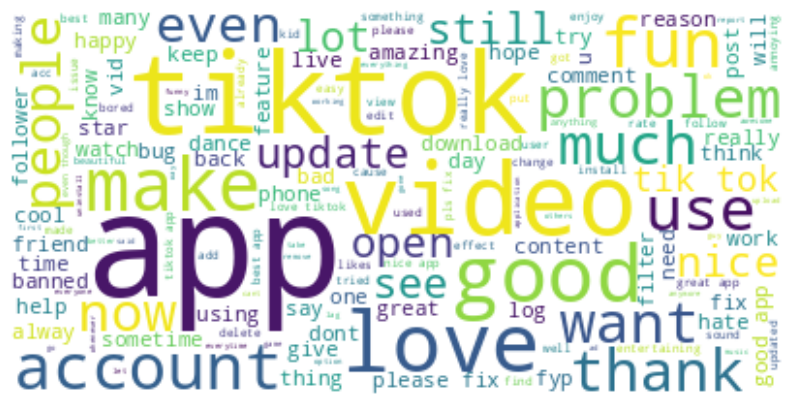

In [10]:
text = " ".join(i for  i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)['pos'] for i in data['content']]
data["Negative"] = [sentiments.polarity_scores(i)['neg'] for i in data['content']]
data["Neutral"] = [sentiments.polarity_scores(i)['neu'] for i in data['content']]
data = data[["content","Positive","Negative","Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,content,Positive,Negative,Neutral
0,The tiktok latest version doesn't let me edit ...,0.070,0.070,0.860
1,"So far, the app is alright. But I had to put a...",0.025,0.041,0.933
2,my Galaxy Fold5 is missing some features that ...,0.023,0.113,0.863
3,This app is honestly one of the best app to se...,0.159,0.000,0.841
4,horrible. VERY LAGGY app for my phone that's 6...,0.032,0.098,0.871


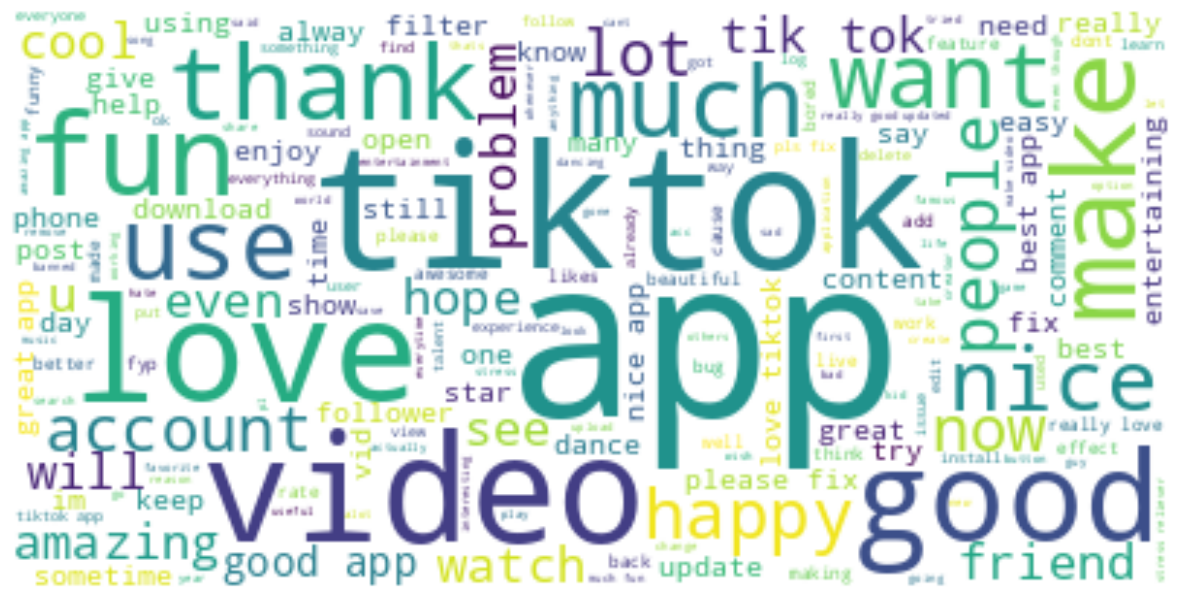

In [14]:
pos = ' '.join([i for i in data['content'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(pos)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

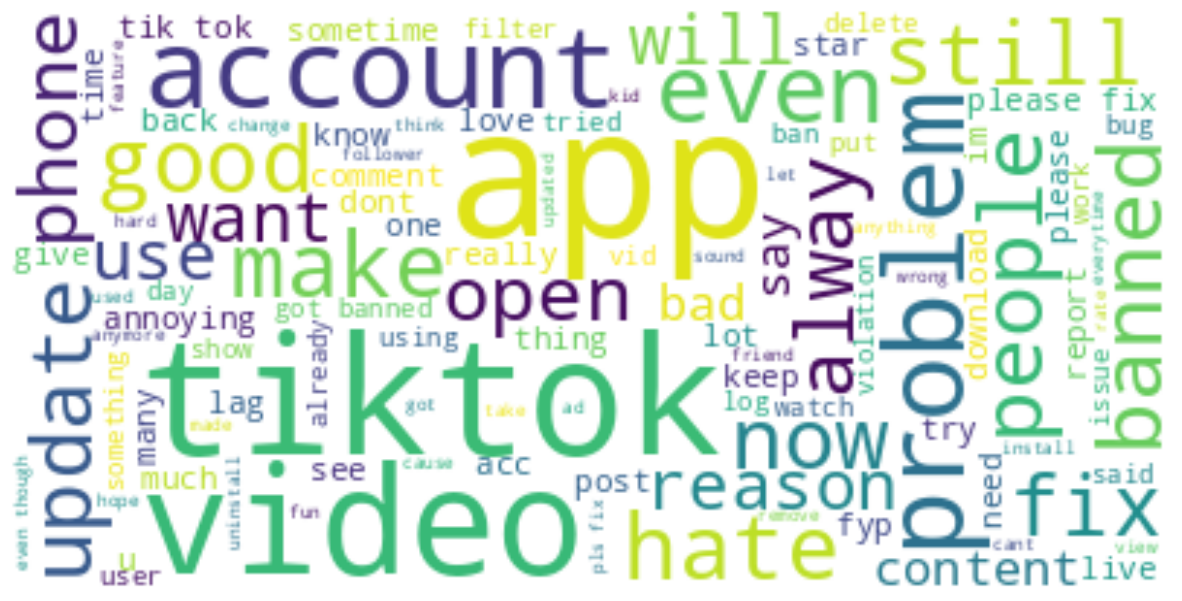

In [15]:
neg = ' '.join([i for i in data['content'][data['Positive'] < data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(neg)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
X = sum(data["Positive"])
Y = sum(data["Negative"])
Z = sum(data["Neutral"])

def sent_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive 😊 ")
  elif (b>a) and (b>c):
    print("Negative 😠 ")
  else:
    print("Neutral 😐")

sent_score(X,Y,Z)

Neutral 😐


In [17]:
print("Positive: ",X)
print("Negative: ",Y)
print("Neutral: ",Z)

Positive:  24062.38099999937
Negative:  7194.363000000091
Neutral:  68743.37100000161
